# Wrapping Probability

One way to estimate the percolation threshold is by evaluating the probability of *periodically wrapping* diffusion pathways existing as a function of the concentration of *occupied sites* (see also [Example 0](../00-Command-Line-Usage/example00.ipynb)).  A diffusion pathway is periodically wrapping if it connects a site with one of its periodic images.

## Input File

Here, we will determine the periodic wrapping probability for the nearest-neighbor site percolation problem of [Example 0](../00-Command-Line-Usage/example00.ipynb). The same general input file can be used:

In [1]:
%%writefile input-bond-rule.json
{
    "structure": "../LiMO2-Crystal-Structures/Cu-fcc.vasp",
    "formula_units": 1.0,
    "sublattices": {
        "A": {
            "description": "Copper sites",
            "sites": {"species": ["Cu"]},
            "initial_occupancy": {"Vac": 1.0}
        }
    },
    "bonds": [
        {
            "sublattices": ["A", "A"],
            "bond_rules": [["NearestNeighborBR"]]
        }
    ],
    "percolating_species": ["Cu"],
    "flip_sequence": [["Vac", "Cu"]]
}

Overwriting input-bond-rule.json


See [Example 0](../00-Command-Line-Usage/example00.ipynb) for a detailed discussion of the input file.

## Calculation using the Command Line Tool

The periodic wrapping probability is computed by `Dribble`'s command line tool if the `-w` (or `--pwrap`) flag is present.  Once again, care has to be taken to select a sufficiently large supercell:

In [2]:
! dribble input-bond-rule.json --supercell 10 10 10 -w


 Parsing input file 'input-bond-rule.json'... done.

 Setting up lattice and neighbor lists... done.

 Lattice and Sites
 -----------------

 Lattice vectors:

     0.00000000   18.00000000   18.00000000
    18.00000000    0.00000000   18.00000000
    18.00000000   18.00000000    0.00000000

 total number of sites : 1000
 occupied sites        : 0 (0 static)
 vacant sites          : 1000 (0 static)
 number of NNs         : 12

 Neighbor List
 -------------

 interaction range          : NNs only
 boxes per lattice direction: 5 5 5
 total number of atoms      : 1000
 av. number of atoms per box: 8.0

 Initializing percolator... done.

 MC percolation simulation
 -------------------------

 Calculating P_wrap(p).
 Averaging over 500 samples:

 0%                25%                 50%                 75%                 100%
 ▮▮▮▮▮▮▮▮▮▮▮▮▮▮▮▮▮▮▮▮▮▮▮▮▮▮▮▮▮▮▮▮▮▮▮▮▮▮▮▮▮▮▮▮▮▮▮▮▮▮▮▮▮▮▮▮▮▮▮▮▮▮▮▮▮▮▮▮▮▮▮▮▮▮▮▮▮▮▮▮ done.

 Return convolution with a binomial distribution.

 Writing results to: per

Per default, `Dribble` returns a binomial convolution of the Monte Carlo results which helps to improve convergence with the number of Monte Carlo samples (500 per default).  These results are written to a file named `percol.wrap`.  The raw data can be requested with the flag `--save-raw`.

Let's take a look at the generated output file:

In [3]:
!head percol.wrap

#     p         P_wrap(p)   cumulative
  0.01000000   0.00000000   0.00000000
  0.02000000   0.00000000   0.00000000
  0.03000000   0.00000000   0.00000000
  0.04000000   0.00000000   0.00000000
  0.05000000   0.00000000   0.00000000
  0.06000000   0.00000000   0.00000000
  0.07000000   0.00000025   0.00000000
  0.08000000   0.00007150   0.00000021
  0.09000000   0.00302320   0.00001176


The first column in the output file contains the relative site occupancy, i.e., the fraction of sites that is occupied.  The second column gives the probability that periodic wrapping is first detected at the given site occupancy, and the third column is the cumulative, i.e., the probability that periodic wrapping occurred at any concentration up to a given one (the integral of the second column).

Maybe a plot makes this easier to grasp:

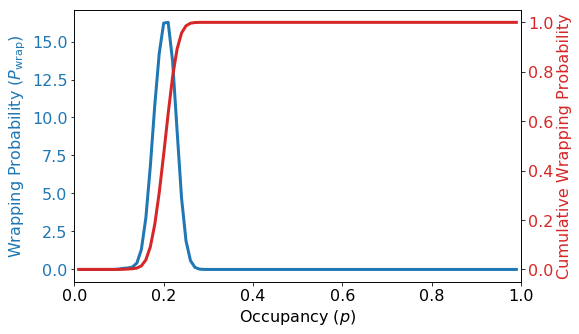

In [5]:
%matplotlib inline
from matplotlib import pyplot as plt
import numpy as np
data = np.loadtxt("percol.wrap")
fig, ax = plt.subplots(figsize=(8,5))
ax.set_xlim(0,1)
ax.set_xlabel("Occupancy ($p$)", fontsize=16)
ax.set_ylabel(r"Wrapping Probability ($P_{\rm{wrap}}$)", fontsize=16, color="tab:blue")
ax.tick_params(labelsize=16)
ax.tick_params(axis='y', labelcolor="tab:blue")

ax2 = ax.twinx()
ax2.set_ylabel(r"Cumulative Wrapping Probability", fontsize=16, color="tab:red")
ax2.tick_params(labelsize=16, labelcolor="tab:red")

ax.plot(data[:,0], data[:,1], linewidth=3, color="tab:blue")
ax2.plot(data[:,0], data[:,2], linewidth=3, color="tab:red")
plt.show()

As seen in the plot, the periodic wrapping probability has a peak at the percolation threshold $x_c\approx{}0.199$.  With increasing cell size, the cumulative approaches a step function that is $0$ below the percolation threshold and $1$ above.